# Personalized Learning Insights: Student Behavior Analysis and Course Recommendations

## Overview
This project analyzes student data from the Personalized Learning Dataset to uncover insights into student behavior, performance, and engagement in an online learning platform. By leveraging data analysis and visualization techniques, the project aims to identify key patterns in student demographics, course popularity, engagement levels, and dropout likelihood. Additionally, a simple rule-based course recommendation system is developed to provide personalized learning suggestions, enhancing the overall student experience and supporting educators in optimizing learning strategies.

## Steps
### Data Exploration and Cleaning
- Loaded the dataset and inspected its structure.
- Checked for missing values (none found) and ensured data consistency.

### Demographic Analysis
- Analyzed the distribution of students by age, gender, and education level to understand the platform's user base.
- Visualized age distribution, gender breakdown, and education levels using histograms, pie charts, and bar plots.

### Course Popularity and Feedback Analysis
- Identified the most popular courses based on enrollment numbers.
- Evaluated student satisfaction through average feedback scores per course using bar plots.

### Engagement and Performance Analysis
- Examined engagement levels (Low, Medium, High) and their impact on performance metrics (quiz scores, assignment completion rates, and final exam scores).
- Visualized engagement distribution and performance trends using pie charts and grouped bar plots.

### Dropout Likelihood Analysis
- Analyzed dropout likelihood across demographic groups, courses, and engagement levels.
- Visualized dropout rates and correlations with interaction metrics (e.g., time spent on videos, forum participation).

### Personalized Course Recommendations
- Developed a rule-based system to recommend courses based on students' past performance and course history.
- Provided tailored suggestions to improve student engagement and learning outcomes.

### Advanced Visualizations and Insights
- Created additional visualizations (e.g., heatmaps, scatter plots) to explore relationships between student interactions, performance, and demographics.
- Summarized key findings to support data-driven decision-making for educators.

## Tools Used
- Python (Pandas, NumPy)
- Data Visualization (Matplotlib, Seaborn, Plotly)
- Interactive Dashboard (Dash)
- Jupyter Notebook

## How to Run
Clone this repository and open the Jupyter Notebook:
```bash
git clone <repository_url>
cd <repository_folder>
jupyter notebook Personalized_Learning_Analysis.ipynb

## 1. Data Exploration and Cleaning
In this section, we will load the dataset, inspect its structure, and handle any missing values to prepare it for analysis.

In [72]:
import pandas as pd

# Load the dataset
data = pd.read_csv("personalized_learning_dataset.csv")

# Display the first few rows to understand the data
print(data.head())

# Check basic statistics of numerical columns
print(data.describe())

# Check for missing values in each column
print(data.isnull().sum())

  Student_ID  Age  Gender Education_Level       Course_Name  \
0     S00001   15  Female     High School  Machine Learning   
1     S00002   49    Male   Undergraduate     Python Basics   
2     S00003   20  Female   Undergraduate     Python Basics   
3     S00004   37  Female   Undergraduate      Data Science   
4     S00005   34  Female    Postgraduate     Python Basics   

   Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                   171              4           67                    2   
1                   156              4           64                    0   
2                   217              2           55                    2   
3                   489              1           65                   43   
4                   496              3           59                   34   

   Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
0                          89           Medium                51   
1                          9

## 2. Demographic Analysis
We will analyze the distribution of students based on age, gender, and education level to understand the platform's user base.

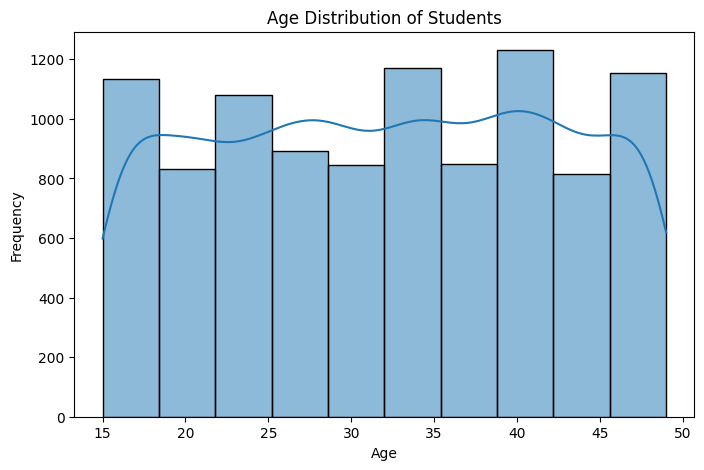

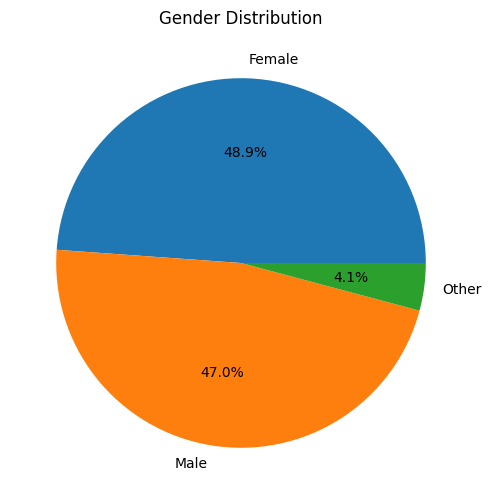

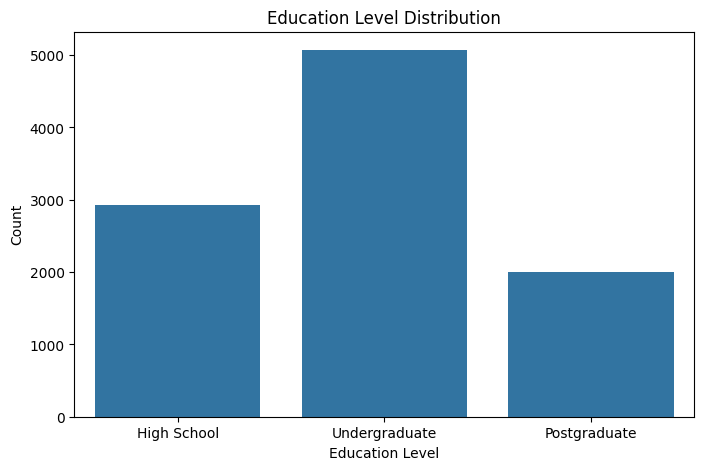

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
plt.figure(figsize=(6, 6))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Education level distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Education_Level', data=data)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

## 3. Course Popularity
We will identify the most popular courses based on enrollment and analyze student satisfaction through feedback scores.

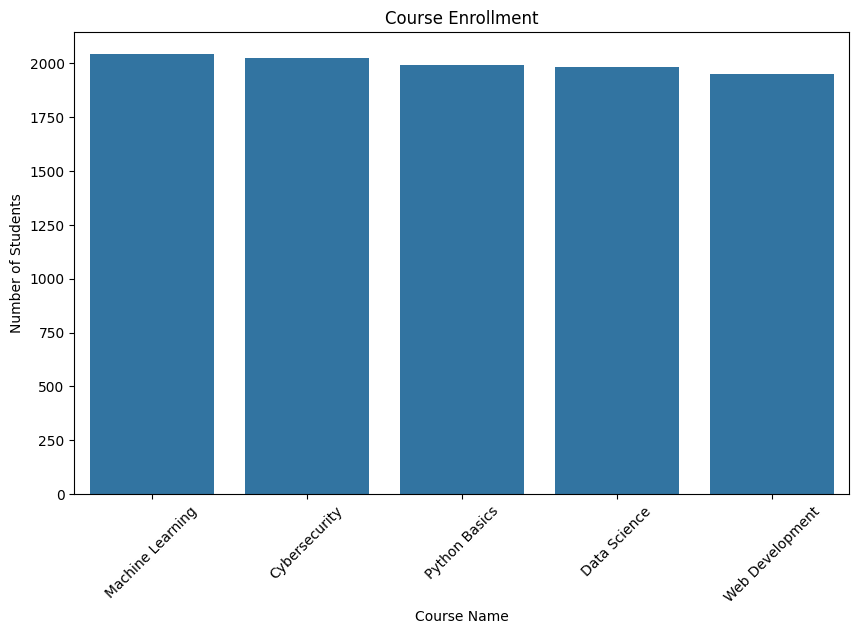

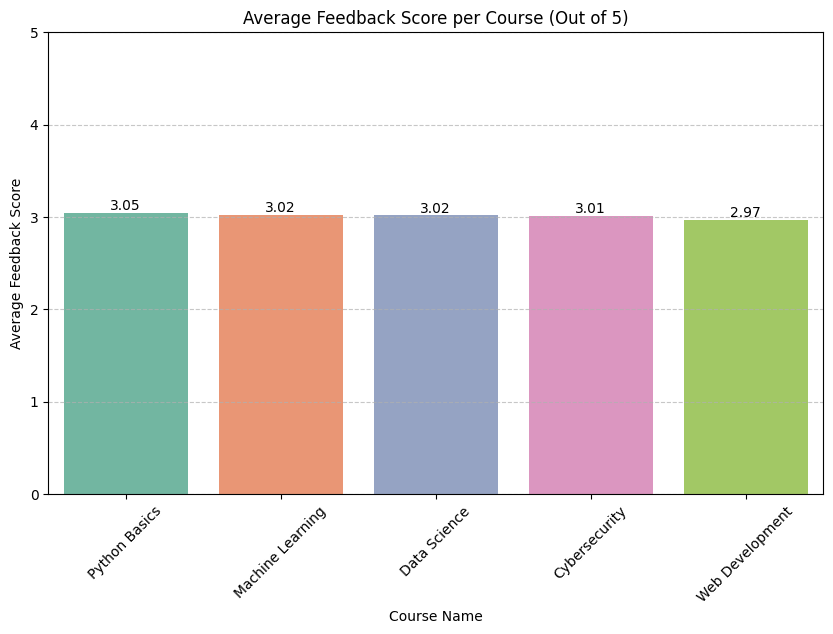

In [91]:
# Course enrollment
plt.figure(figsize=(10, 6))
course_counts = data['Course_Name'].value_counts()
sns.barplot(x=course_counts.index, y=course_counts.values)
plt.title('Course Enrollment')
plt.xlabel('Course Name')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

# Average feedback scores per course
feedback_avg = data.groupby('Course_Name')['Feedback_Score'].mean().sort_values(ascending=False)

# Graph the average feedback scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feedback_avg.index, y=feedback_avg.values, hue=feedback_avg.index, palette='Set2', legend=False)
plt.title('Average Feedback Score per Course (Out of 5)')
plt.xlabel('Course Name')
plt.ylabel('Average Feedback Score')
plt.ylim(0, 5)  # Y eksenini 0-5 aralığına ayarla
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Yatay kılavuz çizgileri

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

## 4. Engagement and Performance Analysis
We will examine how student engagement levels correlate with their performance in quizzes, assignments, and final exams.


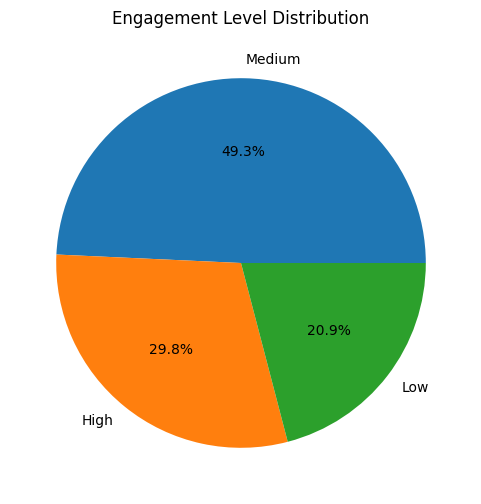

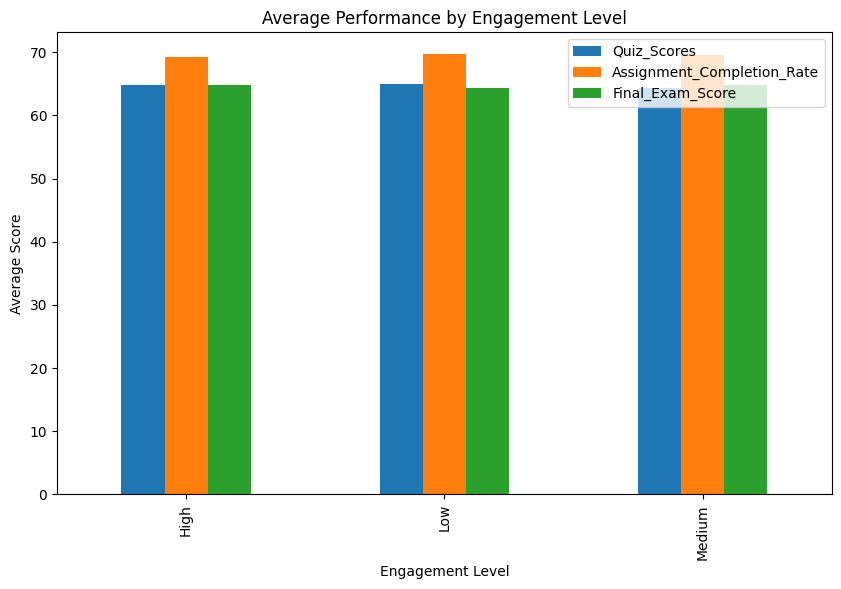

In [75]:
# Engagement level distribution
plt.figure(figsize=(6, 6))
data['Engagement_Level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Engagement Level Distribution')
plt.ylabel('')
plt.show()

# Performance by engagement level
engagement_performance = data.groupby('Engagement_Level')[['Quiz_Scores', 'Assignment_Completion_Rate', 'Final_Exam_Score']].mean()
engagement_performance.plot(kind='bar', figsize=(10, 6))
plt.title('Average Performance by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Average Score')
plt.show()

## Dropout Likelihood Analysis
In this section, we analyze the likelihood of students dropping out based on demographic factors, course enrollment, and engagement levels. We also explore correlations between interaction metrics (e.g., time spent on videos, forum participation) and dropout likelihood to identify potential risk factors.

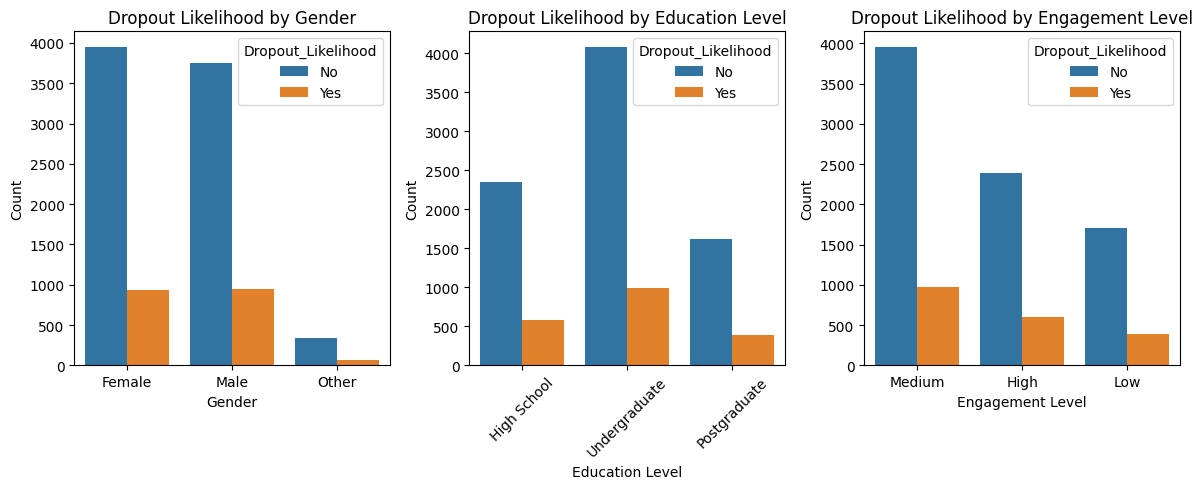

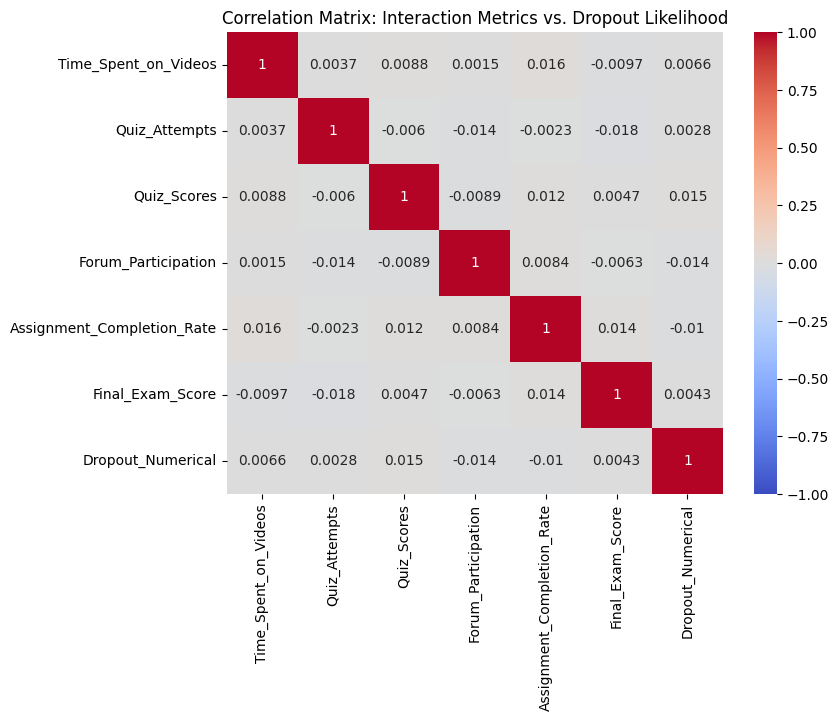

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dropout likelihood by demographic groups
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='Dropout_Likelihood', data=data)
plt.title('Dropout Likelihood by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.countplot(x='Education_Level', hue='Dropout_Likelihood', data=data)
plt.title('Dropout Likelihood by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.countplot(x='Engagement_Level', hue='Dropout_Likelihood', data=data)
plt.title('Dropout Likelihood by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation between interaction metrics and dropout likelihood
# Convert Dropout_Likelihood to numerical for correlation analysis
data['Dropout_Numerical'] = data['Dropout_Likelihood'].map({'Yes': 1, 'No': 0})
interaction_metrics = ['Time_Spent_on_Videos', 'Quiz_Attempts', 'Quiz_Scores', 'Forum_Participation', 'Assignment_Completion_Rate', 'Final_Exam_Score']
corr_matrix = data[interaction_metrics + ['Dropout_Numerical']].corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Interaction Metrics vs. Dropout Likelihood')
plt.show()

## Personalized Course Recommendations
We develop a rule-based system to recommend courses to students based on their past performance and course history. This system aims to enhance student engagement by suggesting relevant courses tailored to their learning needs.

In [77]:
def recommend_course(student_id):
    # Check if the student exists in the dataset
    if student_id not in data['Student_ID'].values:
        return "Student not found"
    
    student = data[data['Student_ID'] == student_id].iloc[0]
    last_course = student['Course_Name']
    final_score = student['Final_Exam_Score']
    engagement = student['Engagement_Level']
    
    # Rule-based recommendations
    if final_score > 80:
        if last_course == "Python Basics":
            return "Advanced Python Programming"
        elif last_course == "Data Science":
            return "Machine Learning"
        elif last_course == "Machine Learning":
            return "Deep Learning"
        else:
            return "Advanced Data Science"
    elif engagement == "Low":
        return "Introduction to Study Skills"  # To improve engagement
    else:
        if last_course == "Python Basics":
            return "Data Science"
        elif last_course == "Data Science":
            return "Machine Learning"
        elif last_course == "Cybersecurity":
            return "Advanced Cybersecurity"
        elif last_course == "Web Development":
            return "Full Stack Development"
        else:
            return "Python Basics"  # Default suggestion for other courses

# Test the recommendation system with a few student IDs
test_ids = ['S00001', 'S00002', 'S00003', 'S99999']
for student_id in test_ids:
    print(f"Recommendation for {student_id}: {recommend_course(student_id)}")

Recommendation for S00001: Python Basics
Recommendation for S00002: Advanced Python Programming
Recommendation for S00003: Data Science
Recommendation for S99999: Student not found


## Customized Thresholds
We refine the recommendation system by introducing more granular performance and engagement segments, making suggestions more tailored to individual student profiles.

In [78]:
def recommend_course_with_thresholds(student_id):
    if student_id not in data['Student_ID'].values:
        return "Student not found"
    
    student = data[data['Student_ID'] == student_id].iloc[0]
    final_score = student['Final_Exam_Score']
    engagement = student['Engagement_Level']
    last_course = student['Course_Name']
    
    # Adjust thresholds based on analysis
    if final_score >= 85:  # High performance
        performance_tier = 'High'
    elif 65 <= final_score < 85:  # Adjusted medium threshold
        performance_tier = 'Medium'
    else:  # Low performance
        performance_tier = 'Low'
    
    if performance_tier == 'High':
        if last_course == "Python Basics":
            return "Advanced Python Programming"
        elif last_course == "Data Science":
            return "Machine Learning"
        else:
            return "Advanced Data Science"
    elif performance_tier == 'Medium':
        if engagement == 'Low':
            return "Study Skills Workshop"
        else:
            if last_course == "Python Basics":
                return "Data Science"
            else:
                return "Intermediate " + last_course
    else:  # Low performance
        if engagement in ['Low', 'Medium']:
            return "Foundational Learning Skills"
        else:
            return "Introduction to " + last_course

# Test the updated recommendation system
test_ids = ['S00001', 'S00002', 'S00004', 'S99999']
for student_id in test_ids:
    print(f"Recommendation for {student_id}: {recommend_course_with_thresholds(student_id)}")

Recommendation for S00001: Foundational Learning Skills
Recommendation for S00002: Advanced Python Programming
Recommendation for S00004: Introduction to Data Science
Recommendation for S99999: Student not found


## Advanced Visualizations and Insights
In this section, we create additional visualizations to explore relationships between student interactions, performance, and demographics. These insights help educators make data-driven decisions to improve the learning experience.

We enhance the project with interactive visualizations using Plotly and introduce a basic Dash dashboard to allow educators to explore student data dynamically.

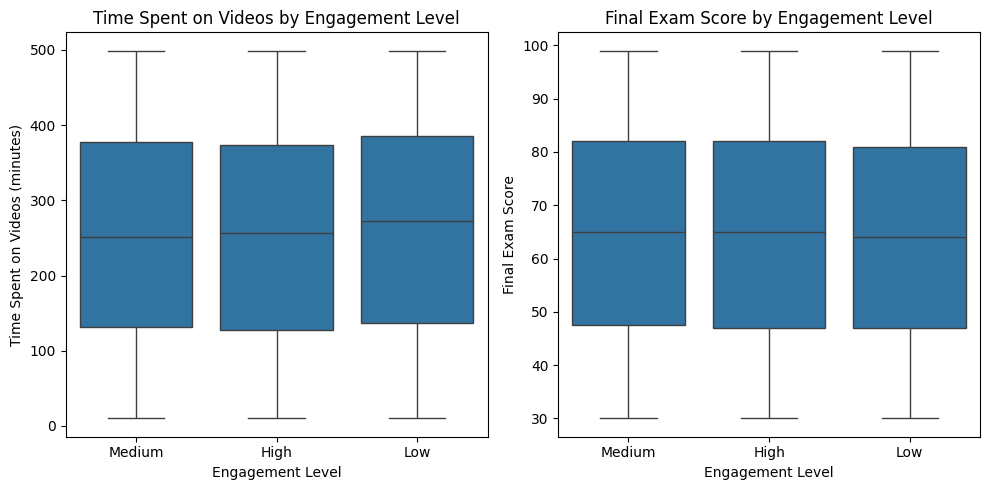

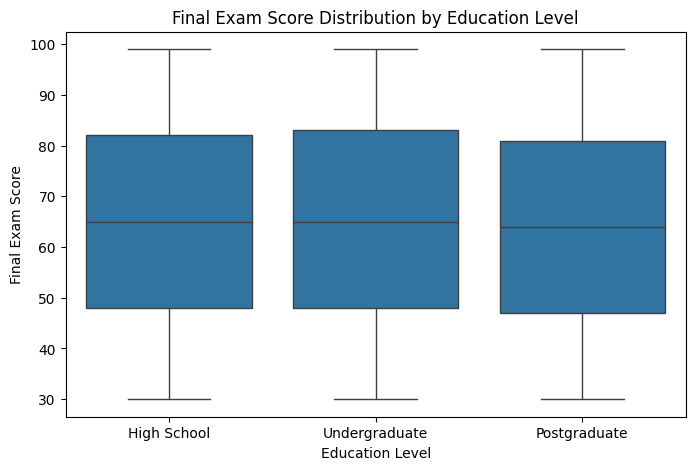

Key Findings:
- Engagement levels show little variation in performance metrics (quiz scores, final exam scores), suggesting other factors may influence success.
- Machine Learning and Python Basics are the most popular courses, with high feedback scores.
- Dropout likelihood is higher among students with low engagement, indicating a need for targeted interventions.


In [79]:
# Box plot: Time spent on videos by engagement level
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Engagement_Level', y='Time_Spent_on_Videos', data=data)
plt.title('Time Spent on Videos by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Time Spent on Videos (minutes)')

# Box plot: Final exam score by engagement level
plt.subplot(1, 2, 2)
sns.boxplot(x='Engagement_Level', y='Final_Exam_Score', data=data)
plt.title('Final Exam Score by Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Final Exam Score')
plt.tight_layout()
plt.show()

# Box plot: Final exam score distribution by education level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education_Level', y='Final_Exam_Score', data=data)
plt.title('Final Exam Score Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Final Exam Score')
plt.show()

# Summary of key findings
print("Key Findings:")
print("- Engagement levels show little variation in performance metrics (quiz scores, final exam scores), suggesting other factors may influence success.")
print("- Machine Learning and Python Basics are the most popular courses, with high feedback scores.")
print("- Dropout likelihood is higher among students with low engagement, indicating a need for targeted interventions.")

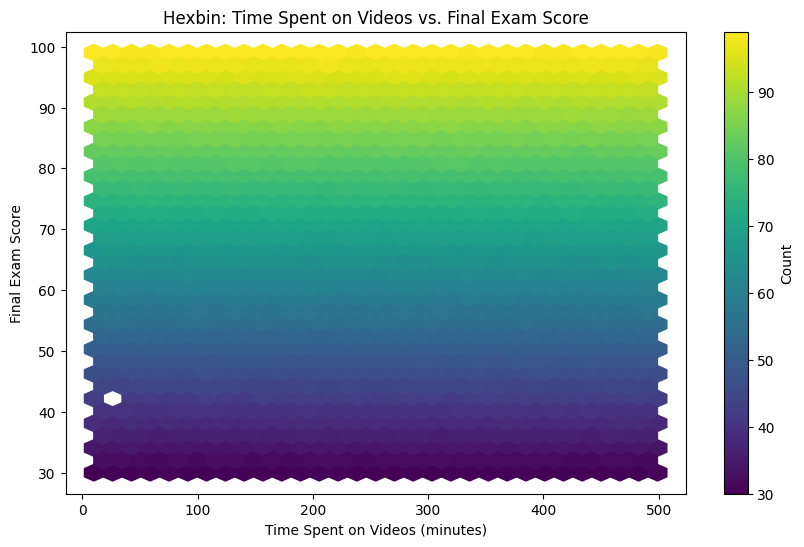

In [80]:
import plotly.express as px

# Interactive scatter plot with Plotly
fig = px.scatter(data, x='Time_Spent_on_Videos', y='Final_Exam_Score', color='Engagement_Level',
                 size='Final_Exam_Score', hover_data=['Student_ID', 'Course_Name'],
                 title='Interactive: Time Spent on Videos vs. Final Exam Score by Engagement Level')
fig.update_layout(xaxis_title='Time Spent on Videos (minutes)', yaxis_title='Final Exam Score')
fig.show()

import matplotlib.pyplot as plt
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

# Hexbin plot for better visualization
plt.figure(figsize=(10, 6))
plt.hexbin(data['Time_Spent_on_Videos'], data['Final_Exam_Score'], C=data['Final_Exam_Score'], gridsize=30, cmap='viridis')
plt.colorbar(label='Count')
plt.title('Hexbin: Time Spent on Videos vs. Final Exam Score')
plt.xlabel('Time Spent on Videos (minutes)')
plt.ylabel('Final Exam Score')
plt.show()

# Dash Dashboard with Multiple Filters
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Student Engagement Dashboard"),
    dcc.Dropdown(
        id='engagement-dropdown',
        options=[{'label': i, 'value': i} for i in data['Engagement_Level'].unique()],
        value='Medium'
    ),
    dcc.Dropdown(
        id='education-dropdown',
        options=[{'label': i, 'value': i} for i in data['Education_Level'].unique()],
        value=data['Education_Level'].unique()[0]
    ),
    dcc.RadioItems(
        id='metric-radio',
        options=[{'label': i, 'value': i} for i in ['Final_Exam_Score', 'Quiz_Scores']],
        value='Final_Exam_Score',
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id='engagement-graph')
])

@app.callback(
    Output('engagement-graph', 'figure'),
    [Input('engagement-dropdown', 'value'), Input('education-dropdown', 'value'), Input('metric-radio', 'value')]
)
def update_graph(selected_engagement, selected_education, selected_metric):
    filtered_data = data[(data['Engagement_Level'] == selected_engagement) & (data['Education_Level'] == selected_education)]
    fig = px.box(filtered_data, x='Engagement_Level', y=selected_metric,
                 title=f'{selected_metric.replace("_", " ").title()} Distribution for {selected_engagement} Engagement and {selected_education} Education')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

## Conclusion
This project provided valuable insights into student behavior and performance on an online learning platform. Key takeaways include:
- The platform has a diverse user base, with a balanced gender distribution and a majority of undergraduate students.
- Popular courses like Machine Learning and Python Basics receive high feedback, indicating strong student satisfaction.
- Engagement levels have a limited impact on performance, but low engagement is linked to higher dropout likelihood.
- A personalized course recommendation system was implemented to suggest relevant courses, enhancing the learning experience.

